In [4]:
# 导入模块 pandas/numpy/kmeans/matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 读入数据: datafile = "discretization_data.xls" 的 肝气郁结指数
datafile = "../data/discretization_data.xls" 
data = pd.read_excel(datafile)

In [6]:
data

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242
...,...
925,0.284
926,0.103
927,0.287
928,0.296


In [7]:
data = data[u'肝气郁结证型系数'].copy()

In [8]:
type(data)

pandas.core.series.Series

In [9]:
k = 4

In [34]:
d1 = pd.cut(data, k, labels=range(k)) # 离散化的关键函数

In [11]:
d1

0      0
1      3
2      0
3      2
4      1
      ..
925    2
926    0
927    2
928    2
929    1
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [12]:
d1_save_df = pd.DataFrame({'肝气郁结证型系数':data,
                           '等宽离散化': d1})

In [13]:
d1_save_df.to_excel("../data/等宽离散化.xlsx")

In [108]:
pd.cut?

In [109]:
type(d1)

tuple

In [110]:
d1

(0      0
 1      3
 2      0
 3      2
 4      1
       ..
 925    2
 926    0
 927    2
 928    2
 929    1
 Name: 肝气郁结证型系数, Length: 930, dtype: category
 Categories (4, int64): [0 < 1 < 2 < 3],
 array([0.025522, 0.1455  , 0.265   , 0.3845  , 0.504   ]))

In [111]:
pd.cut?

In [114]:
(data.max() - data.min()) / 4

0.1195

In [115]:
data.max(),data.min()

(0.504, 0.026)

In [116]:
w = data.max() - data.min()

In [117]:
data.min() - w * 0.001

0.025522

In [118]:
p1 = [0.1455  , 0.265   , 0.3845  , 0.504   ]
p2 = [0.025522, 0.1455  , 0.265   , 0.3845  ]
diff = [p1[i] - p2[i] for i in range(4)]
diff    

[0.11997799999999999, 0.11950000000000002, 0.1195, 0.1195]

In [14]:
#############等频率离散化#############

In [15]:
w = [1.0 * i / k for i in range(k+1)]

In [16]:
w

[0.0, 0.25, 0.5, 0.75, 1.0]

In [20]:
data.describe()

count    930.000000
mean       0.232154
std        0.078292
min        0.026000
25%        0.176250
50%        0.231000
75%        0.281750
max        0.504000
Name: 肝气郁结证型系数, dtype: float64

In [21]:
des = data.describe(percentiles=w)

In [22]:
type(des)

pandas.core.series.Series

In [23]:
 des

count    930.000000
mean       0.232154
std        0.078292
min        0.026000
0%         0.026000
25%        0.176250
50%        0.231000
75%        0.281750
100%       0.504000
max        0.504000
Name: 肝气郁结证型系数, dtype: float64

In [24]:
w = des[4:4+k+1]

In [29]:
w

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [32]:
w[0] = w[0] * (1-1e-10) # 向左边扩充一小点儿，以包含最小值（左开右闭区间）

In [33]:
w

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [35]:
d2 = pd.cut(data, w, labels=range(k))

In [36]:
d2

0      0
1      3
2      0
3      3
4      2
      ..
925    3
926    0
927    3
928    3
929    0
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [38]:
d2_save_df = pd.DataFrame({'肝气郁结证型系数':data,
                          '等频离散化': d2})

In [39]:
d2_save_df.to_excel("../data/等频离散化.xlsx")

In [40]:
#############聚类离散化##############

In [41]:
from sklearn.cluster import KMeans

In [42]:
kmodel = KMeans(n_clusters=k, n_jobs=4)

In [43]:
kmodel.fit(data.values.reshape(len(data), 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
c = pd.DataFrame(kmodel.cluster_centers_)

In [45]:
c

,0
0,0.220441
1,0.295007
2,0.136954
3,0.408679


In [47]:
sorted_centers_df = c.sort_values(by=0)

In [48]:
sorted_centers_df # 四个聚类中心点

,0
2,0.136954
0,0.220441
1,0.295007
3,0.408679


In [50]:
win_2_mean = sorted_centers_df.rolling(window=2).mean() # 

In [51]:
win_2_mean # 两两聚类中心的中点

,0
2,NaN
0,0.178698
1,0.257724
3,0.351843


In [59]:
type(win_2_mean)

pandas.core.frame.DataFrame

In [61]:
win_2_mean.iloc[1:][0],list(win_2_mean.iloc[1:][0])

(0    0.178698
 1    0.257724
 3    0.351843
 Name: 0, dtype: float64,
 [0.17869758895131088, 0.25772406433683875, 0.3518431813603706])

In [62]:
cluster_w = [0] + list(win_2_mean.iloc[1:][0]) + [data.max()]

In [63]:
cluster_w

[0, 0.17869758895131088, 0.25772406433683875, 0.3518431813603706, 0.504]

In [64]:
cluster_dis_series = pd.cut(data, w, labels=range(k))

In [65]:
cluster_dis_series

0      0
1      3
2      0
3      3
4      2
      ..
925    3
926    0
927    3
928    3
929    0
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [66]:
cluster_dis_df = pd.DataFrame({'肝气郁结证型系数':data,
                              '聚类离散化结果': cluster_dis_series})

In [67]:
cluster_dis_df

,肝气郁结证型系数,聚类离散化结果
0,0.056,0
1,0.488,3
2,0.107,0
3,0.322,3
4,0.242,2
...,...,...
925,0.284,3
926,0.103,0
927,0.287,3
928,0.296,3


In [68]:
cluster_dis_df.to_excel("../data/聚类离散化.xlsx")

In [69]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

In [98]:
def plot_clustered_figure(d, k, title):
    plt.figure(figsize=(8,3))
    for j in range(0, k):
        x = data[d==j]
        y = [j] * len(x)
        plt.plot(x,y, 'o')
    
    plt.ylim(-0.5, k-0.5)
    plt.title(title)
    plt.xlabel('肝气郁结证型系数')
    plt.ylabel('离散化结果')
    return plt

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

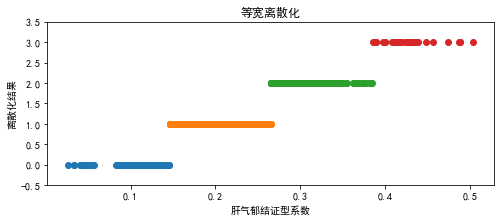

In [99]:
plot_clustered_figure(d1, k, u'等宽离散化')

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

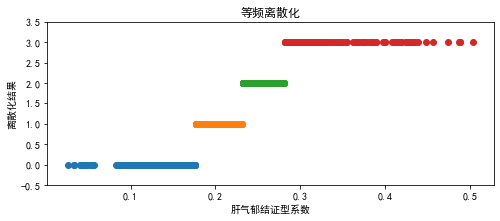

In [100]:
plot_clustered_figure(d2, k, u'等频离散化')

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

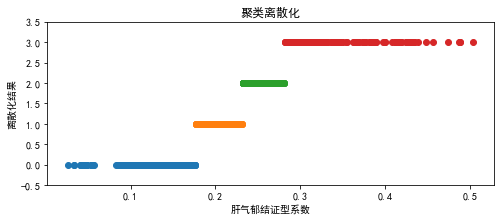

In [102]:
plot_clustered_figure(cluster_dis_series, k, u'聚类离散化')

In [103]:
plt.plot?

In [104]:
data[d1==0]

0      0.056
2      0.107
16     0.100
37     0.053
40     0.042
       ...  
917    0.106
918    0.107
921    0.127
923    0.131
926    0.103
Name: 肝气郁结证型系数, Length: 112, dtype: float64

In [105]:
x = d1[d1==0]

In [106]:
y = [0 for _ in d1[d1==0]]

In [85]:
len(y)

112

In [86]:
len(x)

112

In [87]:
type(x)

pandas.core.series.Series